In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def clean_location(x):
    x = str(x).lower().strip()
    x = x.replace("  ", " ").replace(".", "").replace(",", "")
    if ("ca " in x) or (" ca" in x) or ("california" in x) or ("calif" in x):
        return "ca"
    return x

In [180]:
paths = ["indeed_uber_reviews.csv", "indeed_Uber-Drivers_reviews.csv", 
         "indeed_Ubereats_reviews.csv", "indeed_Lyft_reviews.csv", "indeed_Instacart_reviews.csv",
         "indeed_Grubhub_reviews.csv", "indeed_Doordash_reviews.csv"]
dataframes = []
for path in paths:
    _df = pd.read_csv(path)
    _df["company"] = path.split("_")[1].lower()
    dataframes.append(_df)
    
df = pd.concat(dataframes).drop_duplicates().set_index("id").drop(["url", "language"], axis=1)
df["state"]

df["datetime"] = pd.to_datetime(df["datetime"])
# create year and month columns
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df["state"] = df["state"].apply(clean_location)

In [176]:
state_filter = ["ca", "san francisco", "nuevo león", "san jose", "san diego", "fresno",
                "southern calif", "sacramento", "los angeles", "san francisco bay area", "bay area",
                "san diego", "orange county", "paso robles", "glendale"] # we want to pick reviews that have either of these in the "state" column

df = df[df["state"].isin(state_filter)] # filter out reviews that don't have any of the above in the "state" column
df.to_csv("indeed_reviews_ca.csv", index=False)

In [177]:
df.shape

(5104, 18)

In [149]:
df.to_csv("indeed_reviews.csv")


In [167]:
for i in df["state"].unique():
    if type(i) == str:
        if i not in state_filter and len(i) > 2 and "ca" in i:
            print(i)

canada
chicago il
chicago
1401 w north ave chicago
fl and extended locations
anywhere in chicagoland area
within your local state
opportunity location at uber partner drivers
with uber you start your job location from home
howard street chicago il
illinois chicago
various locations
local
chicago and nw suburbs
chicago illinois
naperville/chicago
is chicago and surroundings suburbs
multiple locations
chicago suburban area
mcallen tx
manteca
northern suburbs of chicago
dca
sw/w suburban chicago/joliet
can't say or they might cut me off
socal
chicagoland
instacart
carlisle
decatur
dacatur/bridgeport
canton ohio
my location is currently temecula murrieta
ocala fl


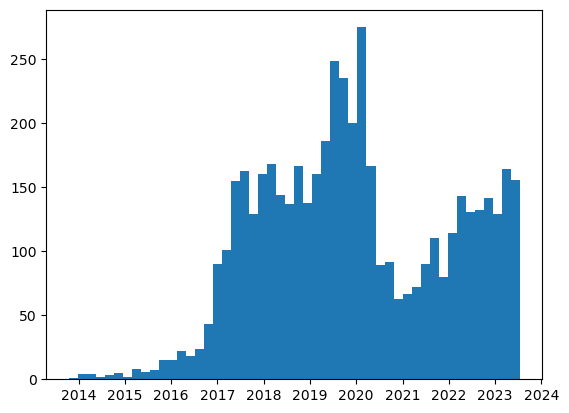

In [152]:
plt.hist(df["datetime"], bins=50)
plt.show()